Import packages

In [1]:
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2

Function to display images in Jupyter NB

In [2]:
def plt_imshow(title, image):
    # convert image from BGR to RGB and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

Define shape detector

In [3]:
class ShapeDetector:
	def __init__(self):
		pass

	# pass in shape c
	# perform thresholding
	# compute contours
	# compute the shape
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		# perimeter of shape
		peri = cv2.arcLength(c, True)
		# approximate it
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			# mainly ratio of w and h == aspect ratio
			# if value is 1, w & h are near identical == square
			# else, rectangle
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			# adding tolerance
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"

		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape

Shape detection with OpenCV

In [4]:
# argument parser
args = {
    "image": "redhat-shapes.png"
}

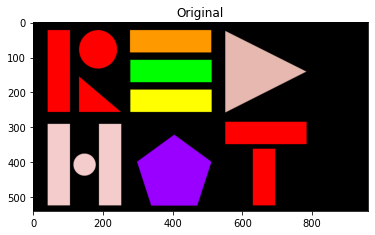

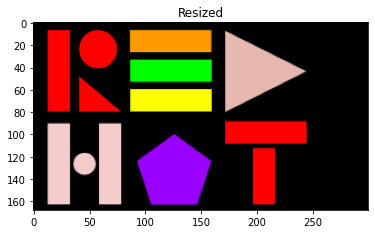

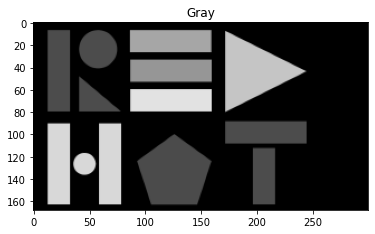

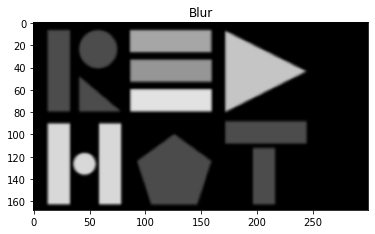

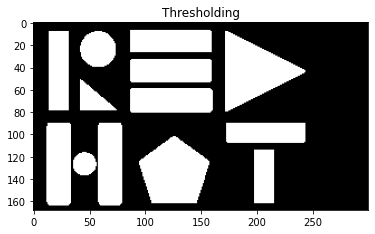

In [5]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(args["image"])
plt_imshow("Original", image)
# resize for noise reduction, less data == faster processing
resized = imutils.resize(image, width=300)
plt_imshow("Resized", resized)
# compute and track the ratio to draw on the original we will multiply by the ratio
# old height to the new resized height
ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt_imshow("Gray", gray)
# smooth the image to reduce frequency noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt_imshow("Blur", blurred)
# reveal the shapes in the image
# the image becomes "binarized"
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
plt_imshow("Thresholding", thresh)

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

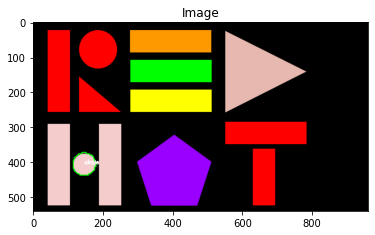

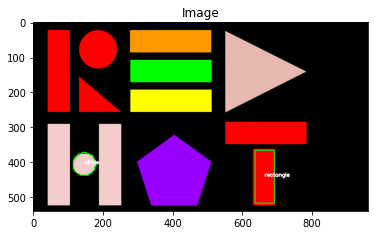

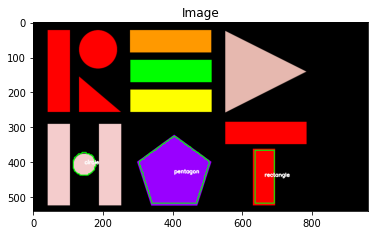

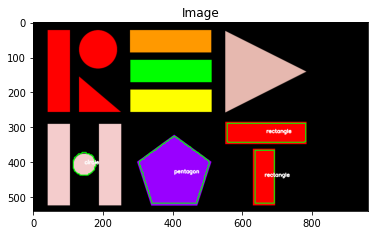

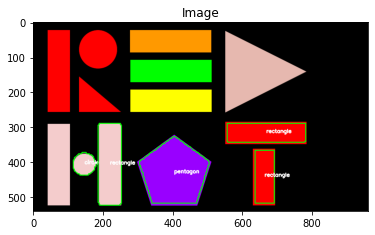

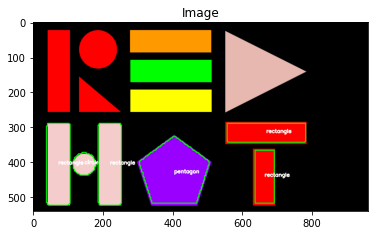

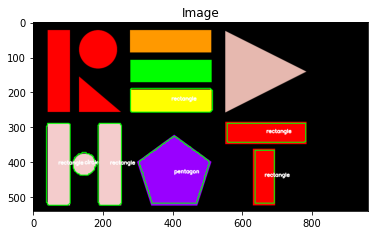

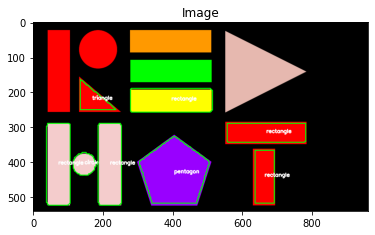

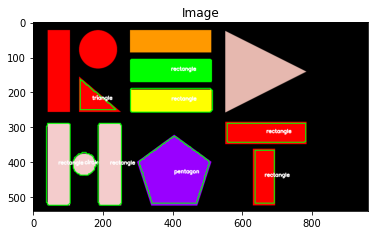

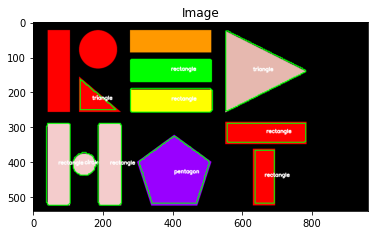

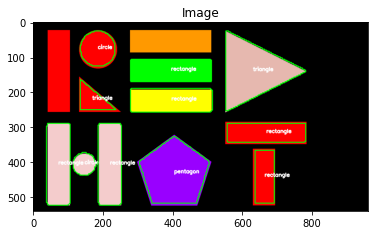

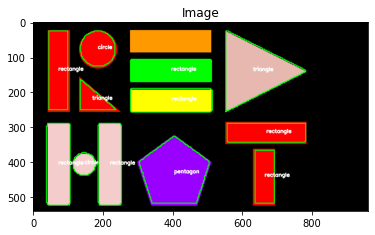

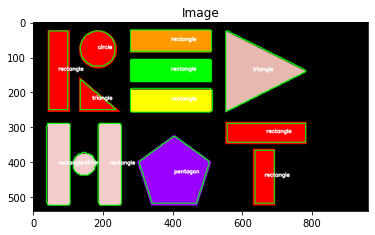

In [6]:
# loop over the contours individually
for c in cnts:
	# compute the center of the contour,
	# then detect the name of the shape
	#  using only the contour
	M = cv2.moments(c)
	# find the centroid of the shape
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	# contour is just an XY coordinate, where each point is
	# take each XY multiply by aspect ratio
	# convert to integer
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	# draw the name of the shape
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)

	# show the output image
	plt_imshow("Image", image)